# 1) Generar un archivo tipo Notebook de Python que contenga el código fuente :
- Exploratory Data Analysis (EDA): Uso de librería pandas y otras librerías
- Leer archivo de venta de videojuegos vgsales.csv. Revisar la descripción en
https://www.kaggle.com/datasets/gregorut/videogamesales
- Con lo aprendido hasta el momento, generar un análisis completo de EDA aplicado al archivo que contenga por lo menos
- Lectura del archivo, head, tail, sample, describe. Validación de columnas numéricas para que el describe funcione con todas.
- Elementos mínimos: 
- Totales: 
    - 1) Total de videojuegos analizados, 
    - 2) total de géneros analizados, 
    - 3) Plataformas analizadas 
- Ventas: 
    - 1) Total de ventas por año, 
    - 2) Juegos más vendidos por año, 
    - 3) Plataformas con más ingresos por año. Todos estos números desglosados por ingreso: NA, EU, JP, Otros y el Global, 
    - 4) Gráfico de comparación de ventas entre géneros por año, ❖ Insights: 2 Gráficos adicionales interesantes
# 2) Es necesario realizar el código en Python utilizando las funciones estudiadas.
# 3) Guarda y sube el archivo en formato notebook a tu plataforma del curso.

### Lectura del archivo, head, tail, sample, describe. Validación de columnas numéricas para que el describe funcione con todas

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
os.chdir("C:/Users/Ana Luisa/Documents/Andrés/EBAC Analisis de datos/Introduccion en python parte 2/Modulo 19, Exploratory Data Analysis - Kaggle project")
df = pd.read_csv("vgsales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [3]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10310,10312,Rugby 15,PS4,2015.0,Sports,Bigben Interactive,0.03,0.06,0.0,0.02,0.11
11356,11358,LEGO Soccer Mania,PS2,2002.0,Sports,Electronic Arts,0.04,0.03,0.0,0.01,0.08
4164,4166,Deadpool,PS3,2013.0,Action,Activision,0.23,0.17,0.0,0.08,0.47
14602,14605,Girls Only,DS,2010.0,Simulation,Foreign Media Games,0.03,0.00,0.0,0.00,0.03
12559,12561,Ford Racing 3,GBA,2005.0,Racing,Zoo Digital Publishing,0.04,0.02,0.0,0.00,0.06


In [4]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
stringcols = df.select_dtypes(include="object").columns
df[stringcols] = df[stringcols].fillna("").astype(pd.StringDtype())
df.dtypes

Rank              int64
Name             string
Platform         string
Year            float64
Genre            string
Publisher        string
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
pd.options.display.float_format = '{:.2f}'.format 
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


### Analisis univariable
### Plataformas analizadas 

In [7]:

df["Platform"].unique()

<StringArray>
[ 'Wii',  'NES',   'GB',   'DS', 'X360',  'PS3',  'PS2', 'SNES',  'GBA',
  '3DS',  'PS4',  'N64',   'PS',   'XB',   'PC', '2600',  'PSP', 'XOne',
   'GC', 'WiiU',  'GEN',   'DC',  'PSV',  'SAT',  'SCD',   'WS',   'NG',
 'TG16',  '3DO',   'GG', 'PCFX']
Length: 31, dtype: string

### Plataformas con mas cantidad de juegos 

<AxesSubplot:xlabel='Count', ylabel='Platform'>

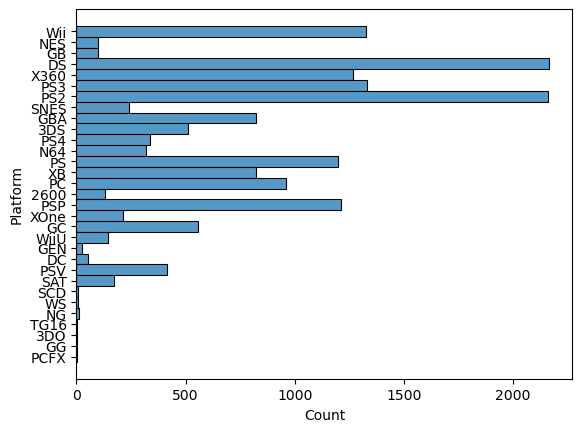

In [8]:
sns.histplot(data= df, y = "Platform")


In [9]:
print(np.sort(df["Year"].unique()))

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.   nan]


In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Limpiando valores nulos

In [11]:

df["Year"] = df["Year"].fillna(df["Year"].median())
# El juego "Imagine: Makeup Artist" salio durante el año 2009
df["Year"] = df["Year"].replace(2020, 2009)
df["Year"].max()
# El ultimo año con juegos analizados dentro del dataframe es el 2017

2017.0

### Total de géneros analizados

In [12]:
df["Genre"].unique()

<StringArray>
[      'Sports',     'Platform',       'Racing', 'Role-Playing',
       'Puzzle',         'Misc',      'Shooter',   'Simulation',
       'Action',     'Fighting',    'Adventure',     'Strategy']
Length: 12, dtype: string

<AxesSubplot:xlabel='Count', ylabel='Genre'>

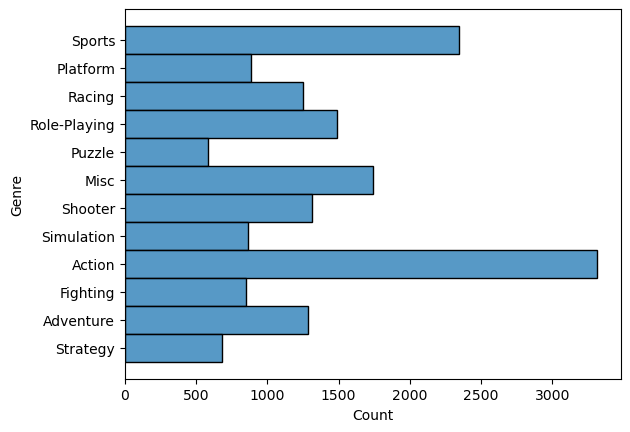

In [13]:
sns.histplot(df, y = "Genre")
# El genero con mayor cantidad de juegos fue accion, seguido por deportes

### Total de videojuegos analizados

In [14]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               38
Genre              12
Publisher         579
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

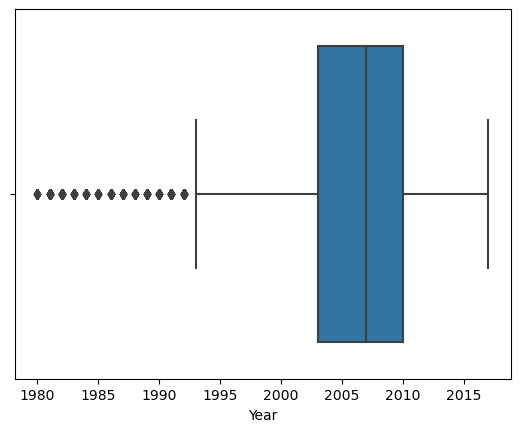

In [15]:
ax = sns.boxplot(x =df["Year"])
# Gran parte de la cantidad de juegos del df salieron entre el 2000 y el 2010

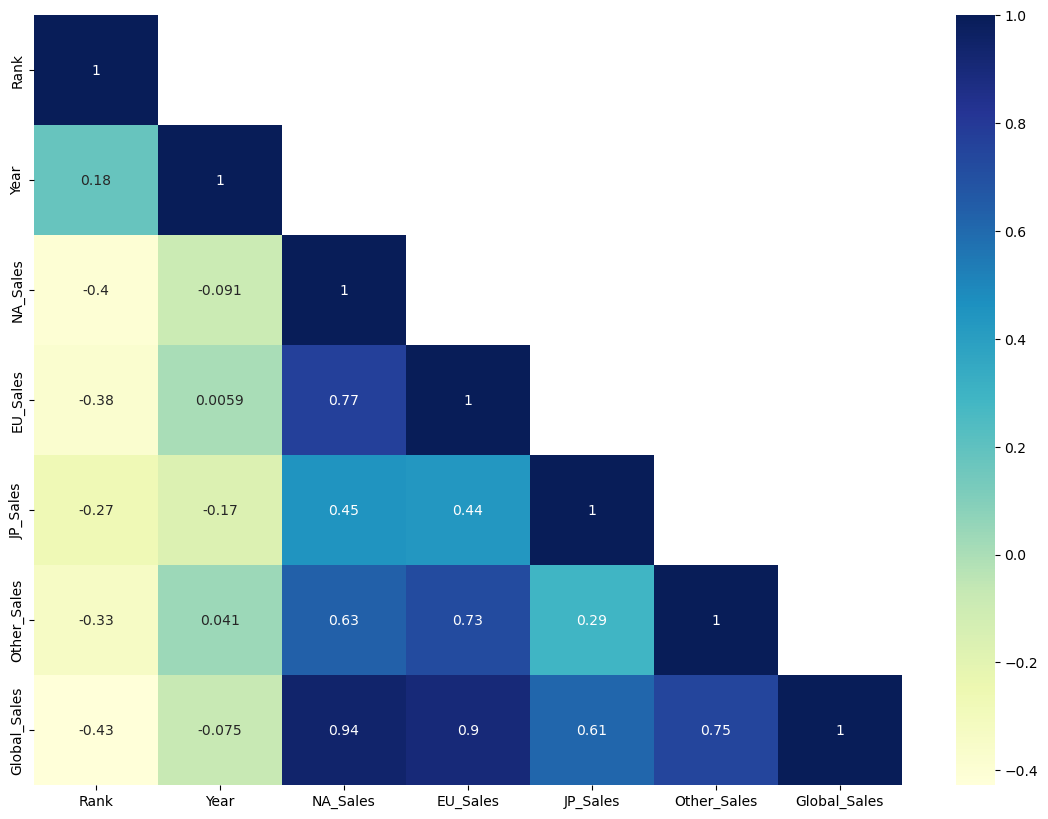

In [16]:
# Analisis de correlacion 
# Mapa de correlacion 
plt.figure(figsize=(14,10))
corr_df = corr = df.corr(method="pearson")
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap= sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

In [17]:
print(len(df.columns))

11


### Agrupamiento 

In [18]:
# Total de ventar por año 
df[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales","Year", "Platform"]].groupby(["Year"]).sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.00,10.59,0.67,0.00,0.12,11.38
1981.00,33.40,1.96,0.00,0.32,35.77
1982.00,26.92,1.65,0.00,0.31,28.86
1983.00,7.76,0.80,8.10,0.14,16.79
1984.00,33.28,2.10,14.27,0.70,50.36
1985.00,33.73,4.74,14.56,0.92,53.94
1986.00,12.50,2.84,19.81,1.93,37.07
1987.00,8.46,1.41,11.63,0.20,21.74
1988.00,23.87,6.59,15.76,0.99,47.22


<AxesSubplot:title={'center':'Serie de tiempo sobre las ventas totales y por region'}, xlabel='Year'>

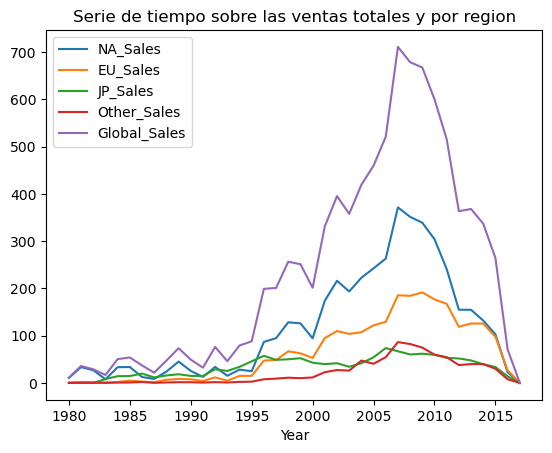

In [19]:
df[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales","Year", "Platform"]].groupby(["Year"]).sum().plot(title="Serie de tiempo sobre las ventas totales y por region")

In [20]:
# Juegos más vendidos por año
df[["Name","NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales","Year"]].groupby("Year").first()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.00,Asteroids,4.00,0.26,0.00,0.05,4.31
1981.00,Pitfall!,4.21,0.24,0.00,0.05,4.50
1982.00,Pac-Man,7.28,0.45,0.00,0.08,7.81
1983.00,Baseball,0.73,0.10,2.35,0.02,3.20
1984.00,Duck Hunt,26.93,0.63,0.28,0.47,28.31
1985.00,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
1986.00,The Legend of Zelda,3.74,0.93,1.69,0.14,6.51
1987.00,Zelda II: The Adventure of Link,2.19,0.50,1.61,0.08,4.38
1988.00,Super Mario Bros. 3,9.54,3.44,3.84,0.46,17.28


In [21]:
df[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales","Year", "Platform"]].groupby(by=["Year","Platform"],as_index=False).sum().sort_values(by="Global_Sales").groupby("Year").last()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.00,2600,10.59,0.67,0.00,0.12,11.38
1981.00,2600,33.40,1.96,0.00,0.32,35.77
1982.00,2600,26.92,1.65,0.00,0.31,28.86
1983.00,NES,2.32,0.46,8.10,0.08,10.96
1984.00,NES,33.02,2.09,14.27,0.70,50.09
1985.00,NES,33.31,4.68,14.54,0.91,53.44
1986.00,NES,11.87,2.80,19.81,1.93,36.41
1987.00,NES,6.62,1.32,11.63,0.19,19.76
1988.00,NES,22.36,6.30,15.41,0.94,45.01


<AxesSubplot:title={'center':'Gráfico de comparación de ventas entre géneros por año'}, xlabel='Year'>

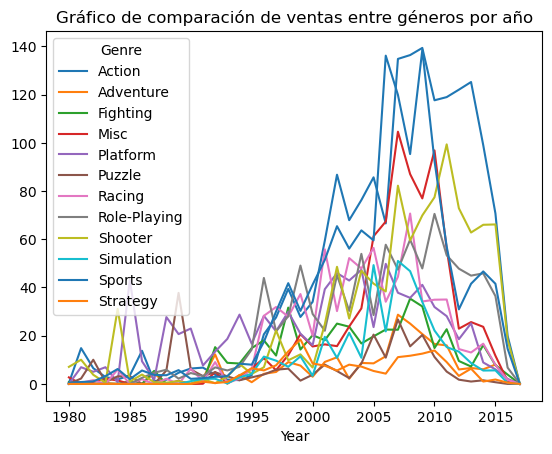

In [22]:
# Gráfico de comparación de ventas entre géneros por año, ❖ Insights: 
pd.crosstab(df["Year"], df["Genre"], values=df.Global_Sales, aggfunc="sum").fillna(0).plot(title= "Gráfico de comparación de ventas entre géneros por año")
# El genero predominante es el de accion

In [23]:
df.sample()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10486,10488,Road Rash: Jailbreak,GBA,2003.00,Racing,Zoo Digital Publishing,0.07,0.03,0.00,0.00,0.10


<AxesSubplot:title={'center':'Los publishers con mayores ganancias'}, ylabel='Publisher'>

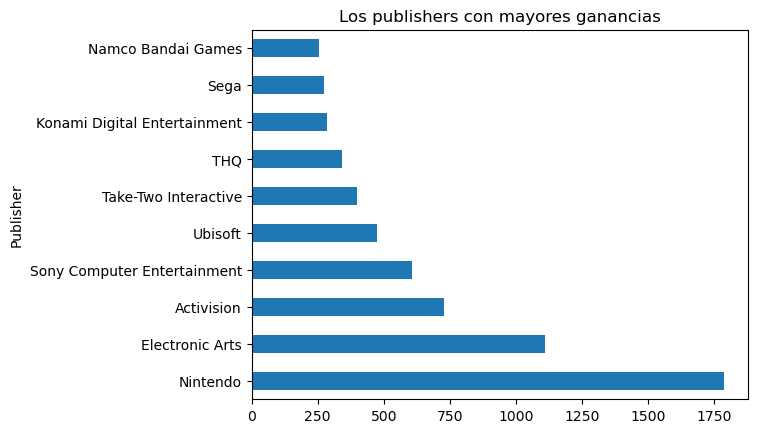

In [24]:
# Insights: 2 Gráficos adicionales interesantes
# Los publishers con mayores ganancias 
df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10).plot.barh(title="Los publishers con mayores ganancias")

<AxesSubplot:title={'center':'Cantidad de juegos por genero'}, xlabel='Genre'>

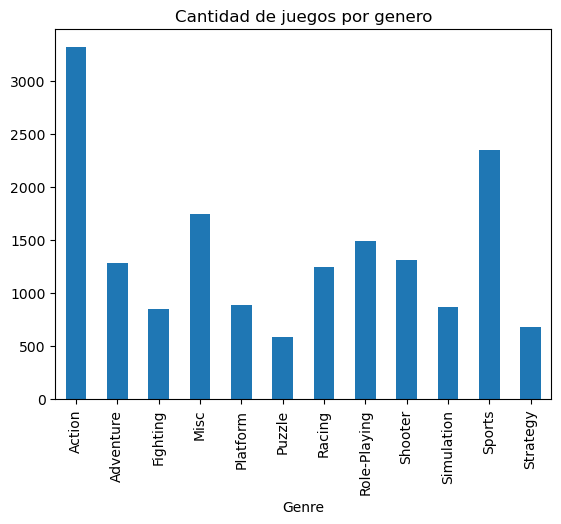

In [29]:
# Grafico con el Total de Videojuegos por Genero
df.groupby("Genre").size().plot.bar(title="Cantidad de juegos por genero" )

<AxesSubplot:title={'center':'Cantidad de juegos por genero'}, xlabel='Genre'>

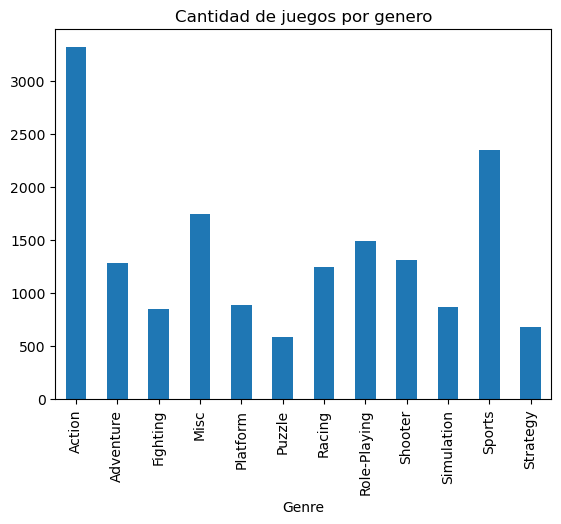

In [26]:
df.groupby("Genre").size().rename("Cantidad de juegos por genero").plot.bar(title= "Cantidad de juegos por genero")

<AxesSubplot:title={'center':'Top 10 de las consolas con mayores ganancias historicas'}, xlabel='Platform'>

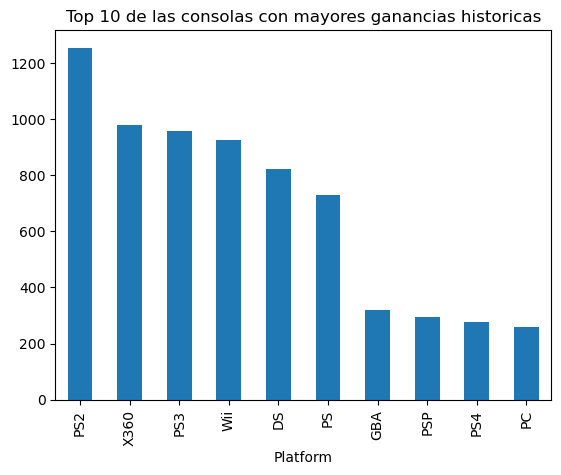

In [27]:
# Top 10 de las consolas con mayores ganancias historicas
# Aunque el "DS" compite en numero de juegos con el "PS2", el "PS2" genero mas ganacias 
# Probablemente porque el ds es una consola movil cuyos juegos eras mas baratos en su tiempo y el ps2 era 
# una consola de sobremensa
df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10).plot.bar(title="Top 10 de las consolas con mayores ganancias historicas")


<AxesSubplot:title={'center':'Top 10 de juegos mas vendidos'}, ylabel='Name'>

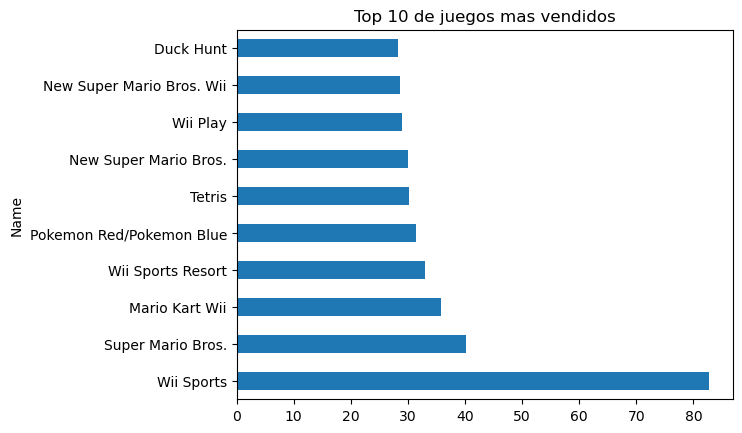

In [28]:
# Top 10 de juegos mas vendidos
# Por la informaciondel dataframe, no hay juegos de la decada 2010-2020 en el top 10
df.groupby("Name")["Global_Sales"].max().sort_values(ascending= False).head(10).plot.barh(title="Top 10 de juegos mas vendidos")